# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [0]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [3]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

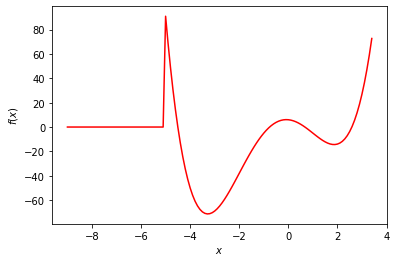

In [4]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [5]:
import torch

H1, H2, H3 = 40, 20, 20 # number of hidden neurons

Niter = 5*10**3+1

# Create an array for detaching loss
import numpy as np
saveLoss = np.zeros(Niter)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(Niter):
  # Forward pass: compute predicted y by passing x to the model.
  y_pred = model(x)

  # Compute and print loss. Save loss in saveLoss
  loss = loss_fn(y_pred, y)
  saveLoss[t] = loss.detach().numpy()
  if t % 1000 == 0:
        print(t, loss.item())

  # Zero the gradients and the optimizer object before running the backward pass.
  model.zero_grad()
  optimizer.zero_grad()

  # Backward pass: compute gradient of the loss with respect to model parameters.
  loss.backward()

  # Calling the step function on an Optimizer makes an update to its parameters.
  optimizer.step()   


0 941.2618408203125
1000 23.885025024414062
2000 6.591931343078613
3000 0.47247686982154846
4000 0.12438037246465683
5000 0.0346173532307148


Plot the training error as a function of the epoch

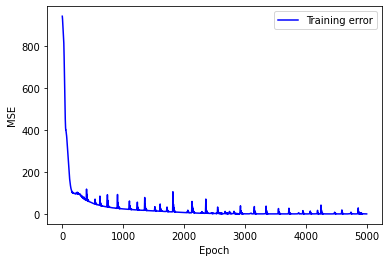

In [6]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

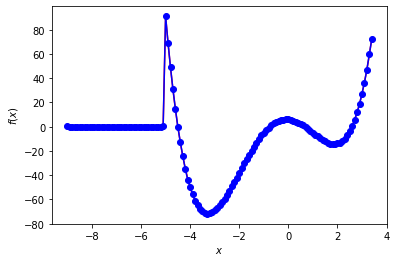

In [7]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-', label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

How many parameters?

In [0]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad) 
    # only for parameters related to gradient, but update by gradient


In [9]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



125 inputs and come out with 1341 parameters. It's overfitting.

Print all the parameters (just for seeing them)

In [10]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 1.0112],
        [ 1.1334],
        [ 0.5459],
        [-0.4164],
        [ 0.3380],
        [ 0.0676],
        [ 0.4245],
        [ 0.5918],
        [ 1.2489],
        [ 0.0124],
        [ 0.0698],
        [-0.7628],
        [-0.5079],
        [-0.8941],
        [ 0.2913],
        [-0.6539],
        [-0.9526],
        [ 0.3378],
        [-0.2296],
        [ 0.3027],
        [ 0.3325],
        [-0.0152],
        [-0.0573],
        [-0.9365],
        [ 0.6987],
        [ 0.0188],
        [-0.8520],
        [ 0.4929],
        [-0.4236],
        [-0.6542],
        [-0.0826],
        [ 0.5101],
        [ 0.4126],
        [ 0.5472],
        [-0.9526],
        [ 0.2202],
        [ 0.8299],
        [ 0.5584],
        [ 0.0030],
        [ 0.4649]], requires_grad=True)
Parameter containing:
tensor([-1.4408,  0.3970,  0.0654,  1.2453,  1.7238,  0.5210,  2.1648, -1.5467,
        -0.6653,  1.9895,  1.4248, -2.1043, -2.4843, -2.9814,  2.5556, -1.0302,
        -3.1562

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [11]:
import torch

H = 5000 # number of hidden neurons

Niter = 5*10**3+1

# Create an array for detaching loss
import numpy as np
saveLoss = np.zeros(Niter)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(Niter):
  # Forward pass: compute predicted y by passing x to the model.
  y_pred = model(x)

  # Compute and print loss. Save loss in saveLoss
  loss = loss_fn(y_pred, y)
  saveLoss[t] = loss.detach().numpy()
  if t % 1000 == 0:
        print(t, loss.item())

  # Zero the gradients and the optimizer object before running the backward pass.
  model.zero_grad()
  optimizer.zero_grad()

  # Backward pass: compute gradient of the loss with respect to model parameters.
  loss.backward()

  # Calling the step function on an Optimizer makes an update to its parameters.
  optimizer.step()   


0 926.7725830078125
1000 89.93236541748047
2000 67.66590118408203
3000 57.1753044128418
4000 51.87345886230469
5000 48.741600036621094


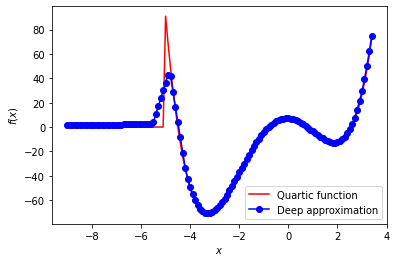

In [12]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [13]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=5000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5000, out_features=1, bias=True)
)>

Total number of parameters 15001

